In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


#import models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [219]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('submit.csv')
var_des = pd.read_csv('var.csv')

In [4]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,612500.0,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123608.0,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.0,2013,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.0,2013,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.0,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18861497.0,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9083122.0,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,10999653.0,0.0,0.0,0.0,0.0,0.0,0.0,1319958.0,1.0,0.0,0.0,0.0,1521555.0,273879.0,0.0,0.0,4564665.0,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.0,2015,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id4


In [5]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,9,11802,P,99,0,6306,8,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,14220000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.706400e+06,1.0,0.0,0.0,0.0,1.123098e+06,166462.0,0.0,0.0,4.146150e+05,5.829900e+04,0.000000e+00,0.0,1706400.0,853200.0,0.0,0.0,0.0,0.0,628439.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14283733.0,0.0,0.0,2.546400e+06,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id0
1,255,2713,C,99,0,4409,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,2.0,1.0,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+05,0.0,0.0,0.0,5.400000e+04,1.0,55075.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1
2,201,152,M,22,0,3603,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2016,57269251.0,0.0,0.0,4947931.0,0.0,0.0,1.364018e+10,0.0,0.0,0.0,2.459261e+09,1.0,0.0,46995188.0,8459133.0,1.229050e+09,239880275.0,661683856.0,119103094.0,7.400178e+09,1.334555e+09,3.713953e+09,668511597.0,555100.0,138775.0,0.0,158000.0,121620155.0,0.0,88381829.0,12.0,121620155.0,0.0,0.0,0.0,31296805.0,67871456.0,849120.0,0.0,0.0,0.0,0.0,0.0,0.0,18071477.0,923419041.0,250100.0,30012.0,987278.0,177710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.820100e+09,710171416.0,0.0,0.0,159211142.0,869382558.0,1.735588e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86000000.0,0.0,0.0,0.0,230000.0,230000.0,0.0,0.0,0.0,0.0,0.0,1.109489e+09,2016,67871456.0,0.0,0.0,12093451.0,NaN,NaN,NaN,NaN,test_id2
3,302,7698,M,22,0,4203,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,0.0,0.0,0.0,6.966936e+07,0.0,0.0,0.0,1.254048e+07,6.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.485189e+08,2.661938e+07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244223.0,12.0,14323125.0,0.0,0.0,0.0,0.0,0.0,3297012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.115383e+08,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id3
4,152,544,P,99,0,6307,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,13159691.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.579157e+06,1.0,0.0,0.0,0.0,6.335690e+05,29056.0,0.0,0.0,6.933900e+05,1.3389

In [6]:
var_des

,Libellé,Intitulé,Title
0,Contribuable,NaN,Rate payer
1,BCT_CODBUR,Code Bureau de contrôle des impôts,Code Tax Control Office
2,CTR_MATFIS,ID Contribuable,Rate payer ID
3,CTR_CATEGO_x,Catégorie Contribuable,Rate payer category
4,CTR_CODTVA,Code TVA,Code TVA
5,FJU_CODFJU,Code Forme Juridique,Code Legal Form
6,CTR_CESSAT,"Code Cessation (0 : Actif, 1 : en cessation)","Cessation Code (0: Active, 1: Inactive)"
7,ACT_CODACT,Code Activité,Activity Code
8,CTR_OBLDIR,Obligation,Obligation
9,CTR_OBLACP,Obligation Acompte Provisionnel,Provisional Down Payment Obligation


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 23.1+ MB


In [8]:
train.isna().sum()

BCT_CODBUR          0
CTR_MATFIS          0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
ACT_CODACT          0
CTR_OBLDIR          0
CTR_OBLACP          0
CTR_OBLRES          0
CTR_OBLFOP          0
CTR_OBLTFP          0
CTR_OBLDCO          0
CTR_OBLTVA          0
CTR_OFODEC         10
CTR_OFODEP         10
CTR_OFODET         10
CTR_OBLAUT         10
CTR_OBLASS         10
CTR_ODTIMB         10
CTR_OBLTCL          0
CTR_OBLTHO         10
CTR_OBLDLI         10
CTR_OBLTVI         10
CTR_RATISS          0
EXE_EXERCI          0
TVA_CHAFF6       1974
TVA_CHAFF7       1974
TVA_CHAF10       1974
TVA_CHAF12       1974
TVA_CAF125       1974
TVA_CHAF15       1974
TVA_CHAF18       1974
TVA_CHAF22       1974
TVA_CHAF29       1974
TVA_CHAF36       1974
TVA_TOTDUE       1974
TVA_MOIDEB       1974
TVA_CRDINI       1974
TVA_BASIMB       1974
TVA_DEDIMB       1974
TVA_BASEQL       1974
TVA_DEDEQL       1974
TVA_BASEQI       1974
TVA_DEDEQI       1974
TVA_BASAUL       1974
TVA_DEDAUL

In [9]:
test.isna().sum()

BCT_CODBUR          0
CTR_MATFIS          0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
ACT_CODACT          0
CTR_OBLDIR          0
CTR_OBLACP          0
CTR_OBLRES          0
CTR_OBLFOP          0
CTR_OBLTFP          0
CTR_OBLDCO          0
CTR_OBLTVA          0
CTR_OFODEC          4
CTR_OFODEP          4
CTR_OFODET          4
CTR_OBLAUT          4
CTR_OBLASS          4
CTR_ODTIMB          4
CTR_OBLTCL          0
CTR_OBLTHO          4
CTR_OBLDLI          4
CTR_OBLTVI          4
CTR_RATISS          0
EXE_EXERCI          0
TVA_CHAFF6        808
TVA_CHAFF7        808
TVA_CHAF10        808
TVA_CHAF12        808
TVA_CAF125        808
TVA_CHAF15        808
TVA_CHAF18        808
TVA_CHAF22        808
TVA_CHAF29        808
TVA_CHAF36        808
TVA_TOTDUE        808
TVA_MOIDEB        808
TVA_CRDINI        808
TVA_BASIMB        808
TVA_DEDIMB        808
TVA_BASEQL        808
TVA_DEDEQL        808
TVA_BASEQI        808
TVA_DEDEQI        808
TVA_BASAUL        808
TVA_DEDAUL

In [10]:
def fill_na(df):
    for col in df.columns:
        if col == 'target' or col == 'CTR_CATEGO_X' or col == 'id':
            continue
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

In [225]:
train = fill_na(train)

In [226]:
te1st = fill_na(test)

In [227]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [230]:
train['CTR_CATEGO_X'].value_counts()

1    12809
2     6835
0     5398
3       11
Name: CTR_CATEGO_X, dtype: int64

In [15]:
a = {'M':0, 'C':1, 'P':2, 'N':3}

In [16]:
train['CTR_CATEGO_X'] = train['CTR_CATEGO_X'].map(a)

In [17]:
test['CTR_CATEGO_X'] = test['CTR_CATEGO_X'].map(a)

In [18]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
0,49,14185,2,99,1,6101,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,612500.0,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123608.0,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.306010e+08,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,54965.109585,0.000000,5.891200e+07,0.000000e+00,2.530630e+06,0.000000e+00,2013,13.575957,8.465864e+09,6.003678e+06,241110.011832,4.717475e+08,9.833204e+08,2.650891e+06,29334.520614,1.636481e+08
1,221,6032,2,99,0,6271,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.306010e+08,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,54965.109585,0.000000,3.425295e+06,0.000000e+00,1.092498e+07,0.000000e+00,2013,11.692894,8.465864e+09,6.003678e+06,241110.011832,4.717475e+08,9.833204e+08,2.650891e+06,29334.520614,1.636481e+08
2,181,8907,2,99,0,6102,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.0,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18861497.0,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.444275e+07,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,54965.109585,836575.591005,6.498808e+07,1.595258e+07,1.773714e+07,1.061817e+09,2015,0.000000,8.465864e+09,6.003678e+06,241110.011832,4.717475e+08,9.833204e+08,2.650891e+06,29334.520614,1.636481e+08
3,252,5783,0,22,0,4403,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9083122.0,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [231]:
X = train.drop('target', axis=1)
y = train['target']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [239]:
lr_model = LinearRegression(n_jobs=-1)

In [240]:
lr_model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [241]:
lr_pred = lr_model.predict(X_test)

In [242]:
np.sqrt(mean_squared_error(y_test, lr_pred))

66.9825752996265

In [244]:
lr_final = lr_model.predict(test)

In [245]:
# submit['target'] = lr_final

In [246]:
# submit.to_csv('fifteen.csv', index=False)

In [247]:
dc_model = DecisionTreeRegressor()

In [248]:
dc_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [249]:
dc_pred = dc_model.predict(X_test)

In [250]:
np.sqrt(mean_squared_error(y_test, dc_pred))

8.178136559486237

In [32]:
#dc_final = dc_model.predict(test)

In [33]:
#submit['target'] = dc_final

In [34]:
#submit.to_csv('second.csv', index=False)

In [35]:
rfc_model = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)

In [36]:
rfc_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)

In [37]:
rfc_pred = rfc_model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, rfc_pred))

6.271479779606384

In [39]:
#rfc_final = rfc_model.predict(test)

In [40]:
#submit['target'] = rfc_final

In [41]:
#submit.to_csv('third.csv', index=False)

In [42]:
knn_model = KNeighborsRegressor()

In [43]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
knn_pred = knn_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, knn_pred))

7.00765623625649

In [46]:
#knn_final = knn_model.predict(test)

In [47]:
#submit['target'] = knn_final

In [48]:
#submit.to_csv('fourth.csv', index=False)

In [49]:
ada_model = AdaBoostRegressor()

In [50]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor()

In [51]:
ada_pred = ada_model.predict(X_test)

In [52]:
np.sqrt(mean_squared_error(y_test, ada_pred))

6.752702518317853

In [53]:
#ada_final = ada_model.predict(test)

In [54]:
#submit['target'] = ada_final

In [55]:
#submit.to_csv('fifth.csv', index=False)

In [80]:
cat_model = CatBoostRegressor(learning_rate=0.1, iterations=110, depth=10)

In [81]:
cat_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=500, use_best_model=True)

0:	learn: 6.9249758	test: 6.9249758	test1: 7.0017279	best: 7.0017279 (0)	total: 267ms	remaining: 29.1s
1:	learn: 6.8090189	test: 6.8090189	test1: 6.8950976	best: 6.8950976 (1)	total: 555ms	remaining: 29.9s
2:	learn: 6.7066238	test: 6.7066238	test1: 6.8013418	best: 6.8013418 (2)	total: 858ms	remaining: 30.6s
3:	learn: 6.6129424	test: 6.6129424	test1: 6.7225760	best: 6.7225760 (3)	total: 1.18s	remaining: 31.3s
4:	learn: 6.5352431	test: 6.5352431	test1: 6.6529905	best: 6.6529905 (4)	total: 1.46s	remaining: 30.6s
5:	learn: 6.4644392	test: 6.4644392	test1: 6.5909712	best: 6.5909712 (5)	total: 1.75s	remaining: 30.4s
6:	learn: 6.3947073	test: 6.3947073	test1: 6.5379998	best: 6.5379998 (6)	total: 2.06s	remaining: 30.3s
7:	learn: 6.3422493	test: 6.3422493	test1: 6.4917753	best: 6.4917753 (7)	total: 2.36s	remaining: 30.1s
8:	learn: 6.2898105	test: 6.2898105	test1: 6.4529678	best: 6.4529678 (8)	total: 2.65s	remaining: 29.8s
9:	learn: 6.2511703	test: 6.2511703	test1: 6.4213119	best: 6.4213119 (9)	

79:	learn: 5.4620408	test: 5.4620408	test1: 6.0690446	best: 6.0690446 (79)	total: 23.9s	remaining: 8.98s
80:	learn: 5.4521207	test: 5.4521207	test1: 6.0668174	best: 6.0668174 (80)	total: 24.2s	remaining: 8.68s
81:	learn: 5.4434079	test: 5.4434079	test1: 6.0647322	best: 6.0647322 (81)	total: 24.5s	remaining: 8.38s
82:	learn: 5.4388007	test: 5.4388007	test1: 6.0627835	best: 6.0627835 (82)	total: 24.8s	remaining: 8.07s
83:	learn: 5.4333521	test: 5.4333521	test1: 6.0617435	best: 6.0617435 (83)	total: 25.2s	remaining: 7.79s
84:	learn: 5.4274184	test: 5.4274184	test1: 6.0601450	best: 6.0601450 (84)	total: 25.6s	remaining: 7.52s
85:	learn: 5.4240440	test: 5.4240440	test1: 6.0597111	best: 6.0597111 (85)	total: 25.9s	remaining: 7.22s
86:	learn: 5.4190032	test: 5.4190032	test1: 6.0584074	best: 6.0584074 (86)	total: 26.1s	remaining: 6.91s
87:	learn: 5.4126995	test: 5.4126995	test1: 6.0567668	best: 6.0567668 (87)	total: 26.4s	remaining: 6.61s
88:	learn: 5.4085584	test: 5.4085584	test1: 6.0555866	b

In [82]:
cat_final = cat_model.predict(test)

In [83]:
submit['target'] = cat_final

In [84]:
submit.to_csv('sixth.csv', index=False)

In [125]:
xgb_model = XGBRegressor(learning_rate =0.1, n_estimators=150, max_depth=10, reg_lambda=9)

In [126]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=9, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
xgb_pred = xgb_model.predict(X_test)

In [128]:
np.sqrt(mean_squared_error(y_test, xgb_pred))

5.868972313275359

In [138]:
xgb_final = xgb_model.predict(test)

In [139]:
submit['target'] = xgb_final

In [140]:
submit.to_csv('seventh.csv', index=False)

In [134]:
def plot_feature_importance(importance, names, model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(50,44))
    
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + ' feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('feature names')

In [130]:
my_train = train.drop('target', axis=1)

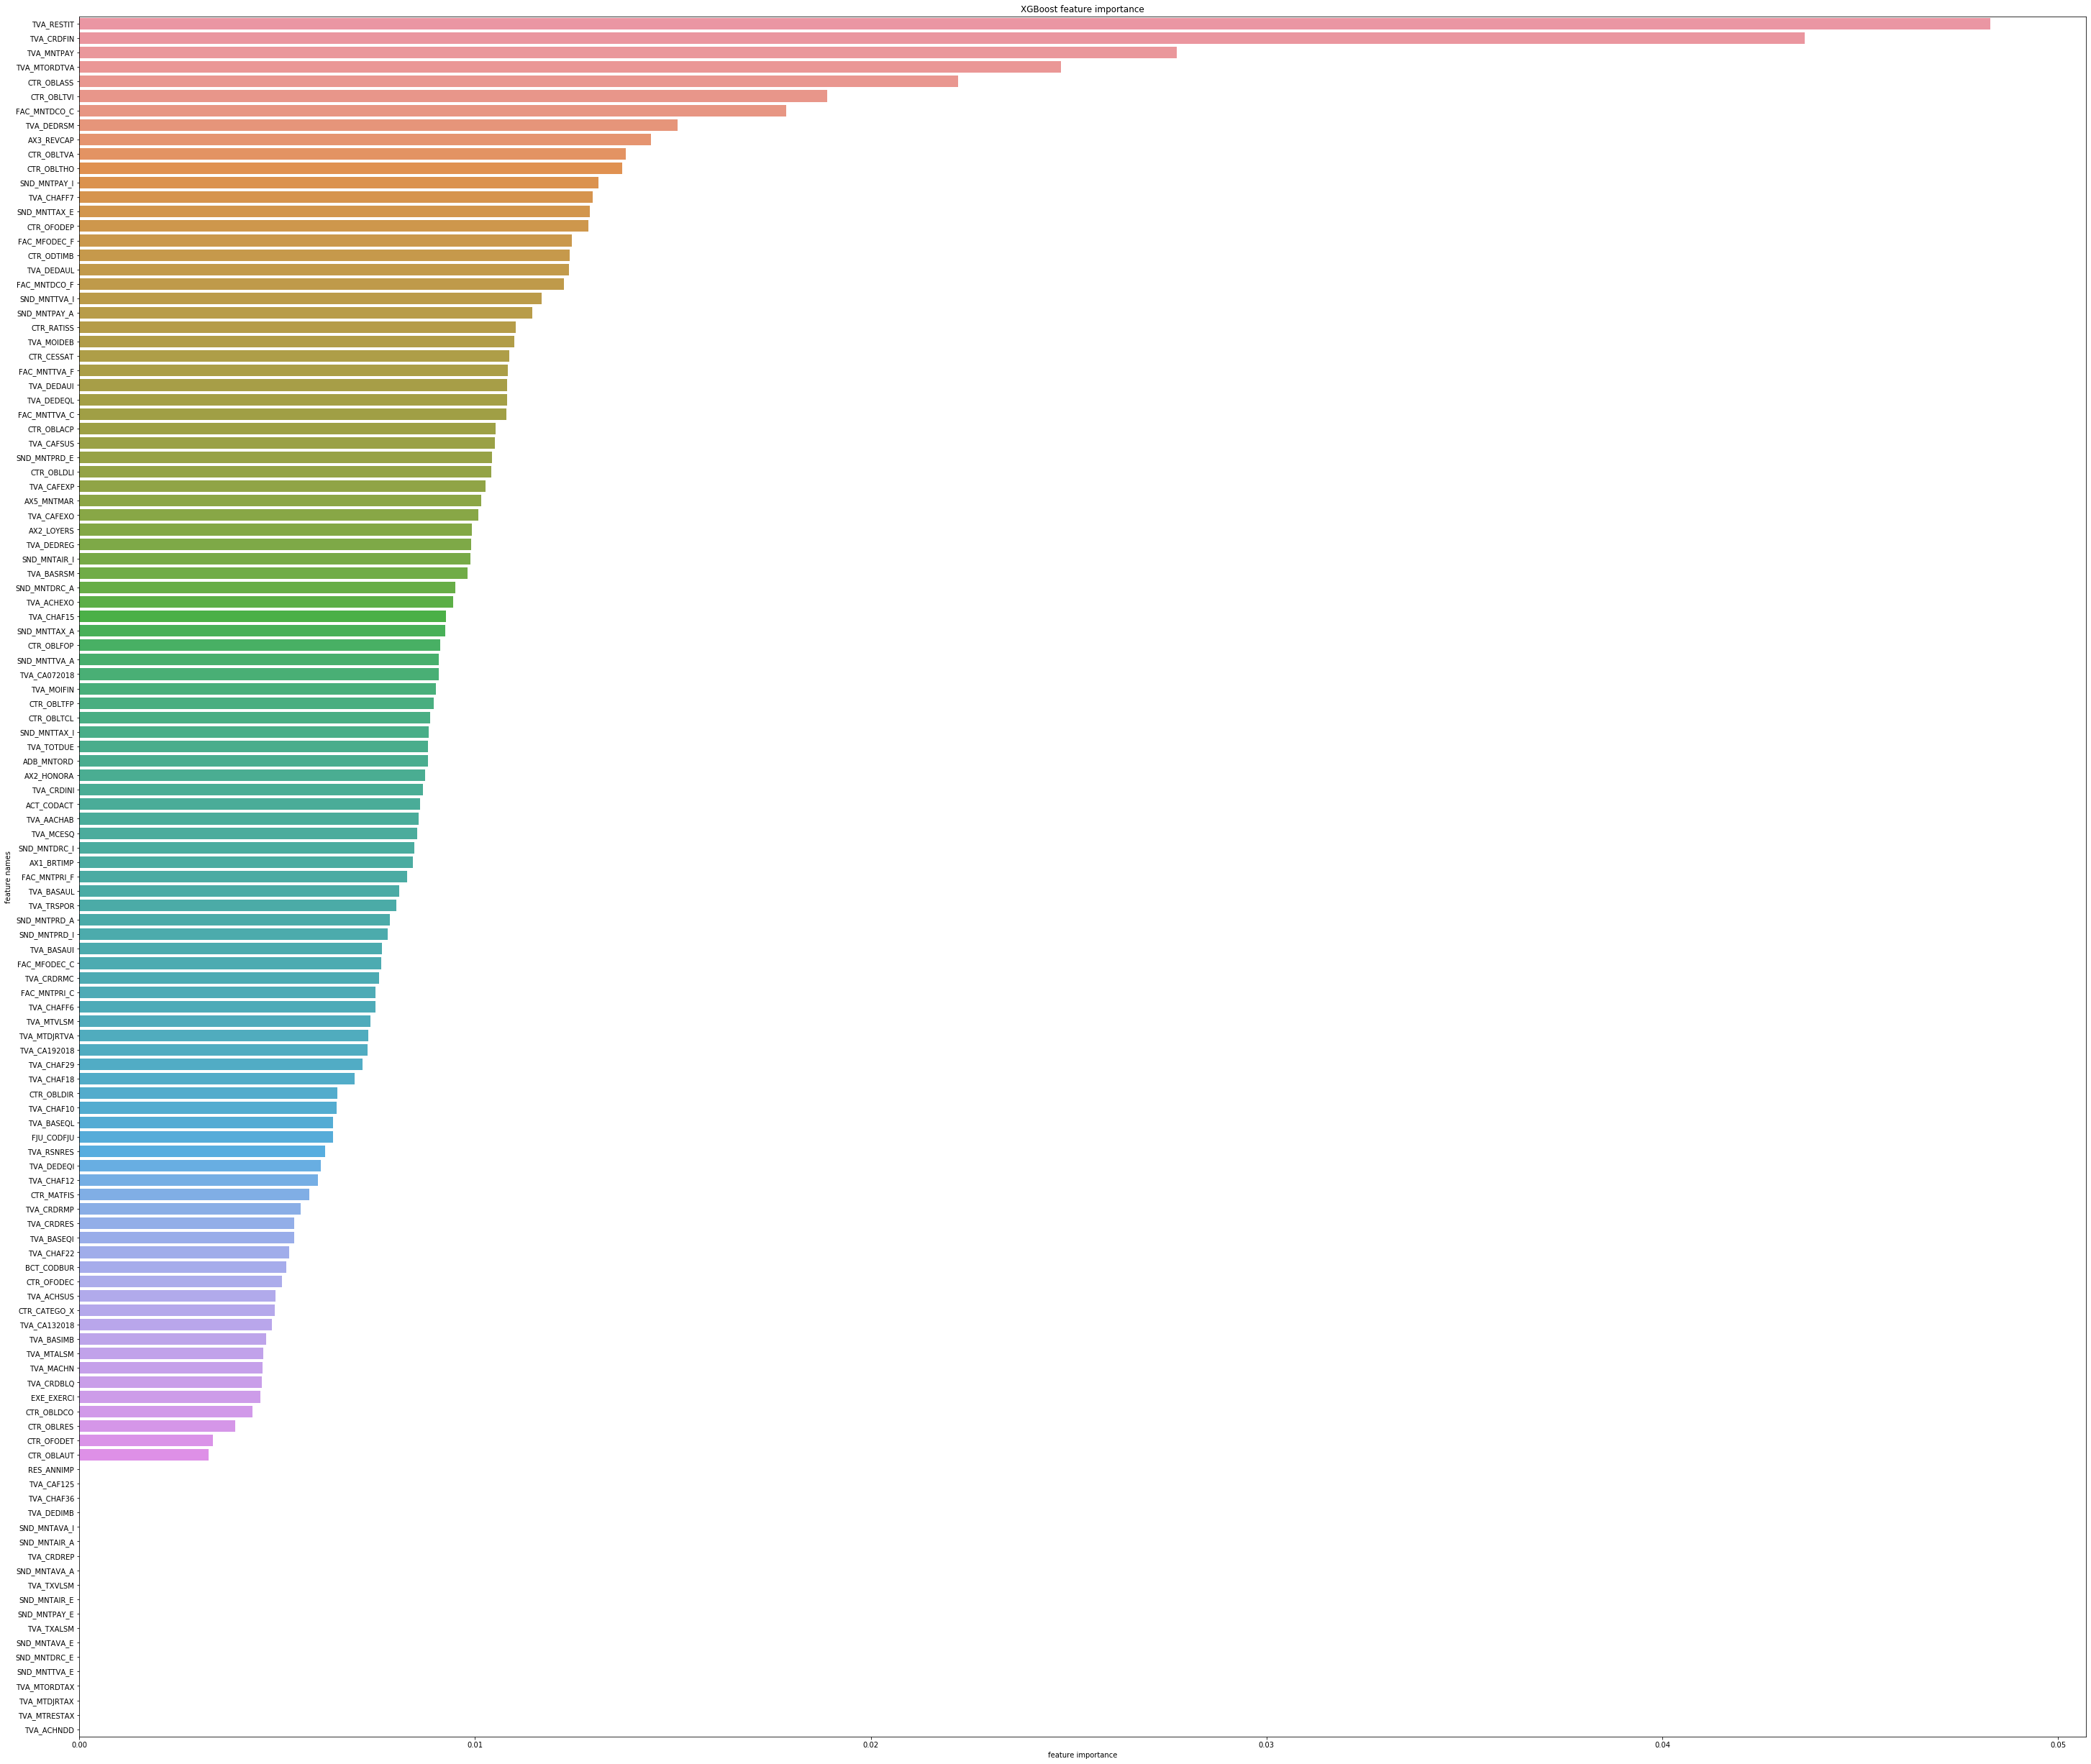

In [135]:
plot_feature_importance(xgb_model.feature_importances_, my_train.columns, 'XGBoost')

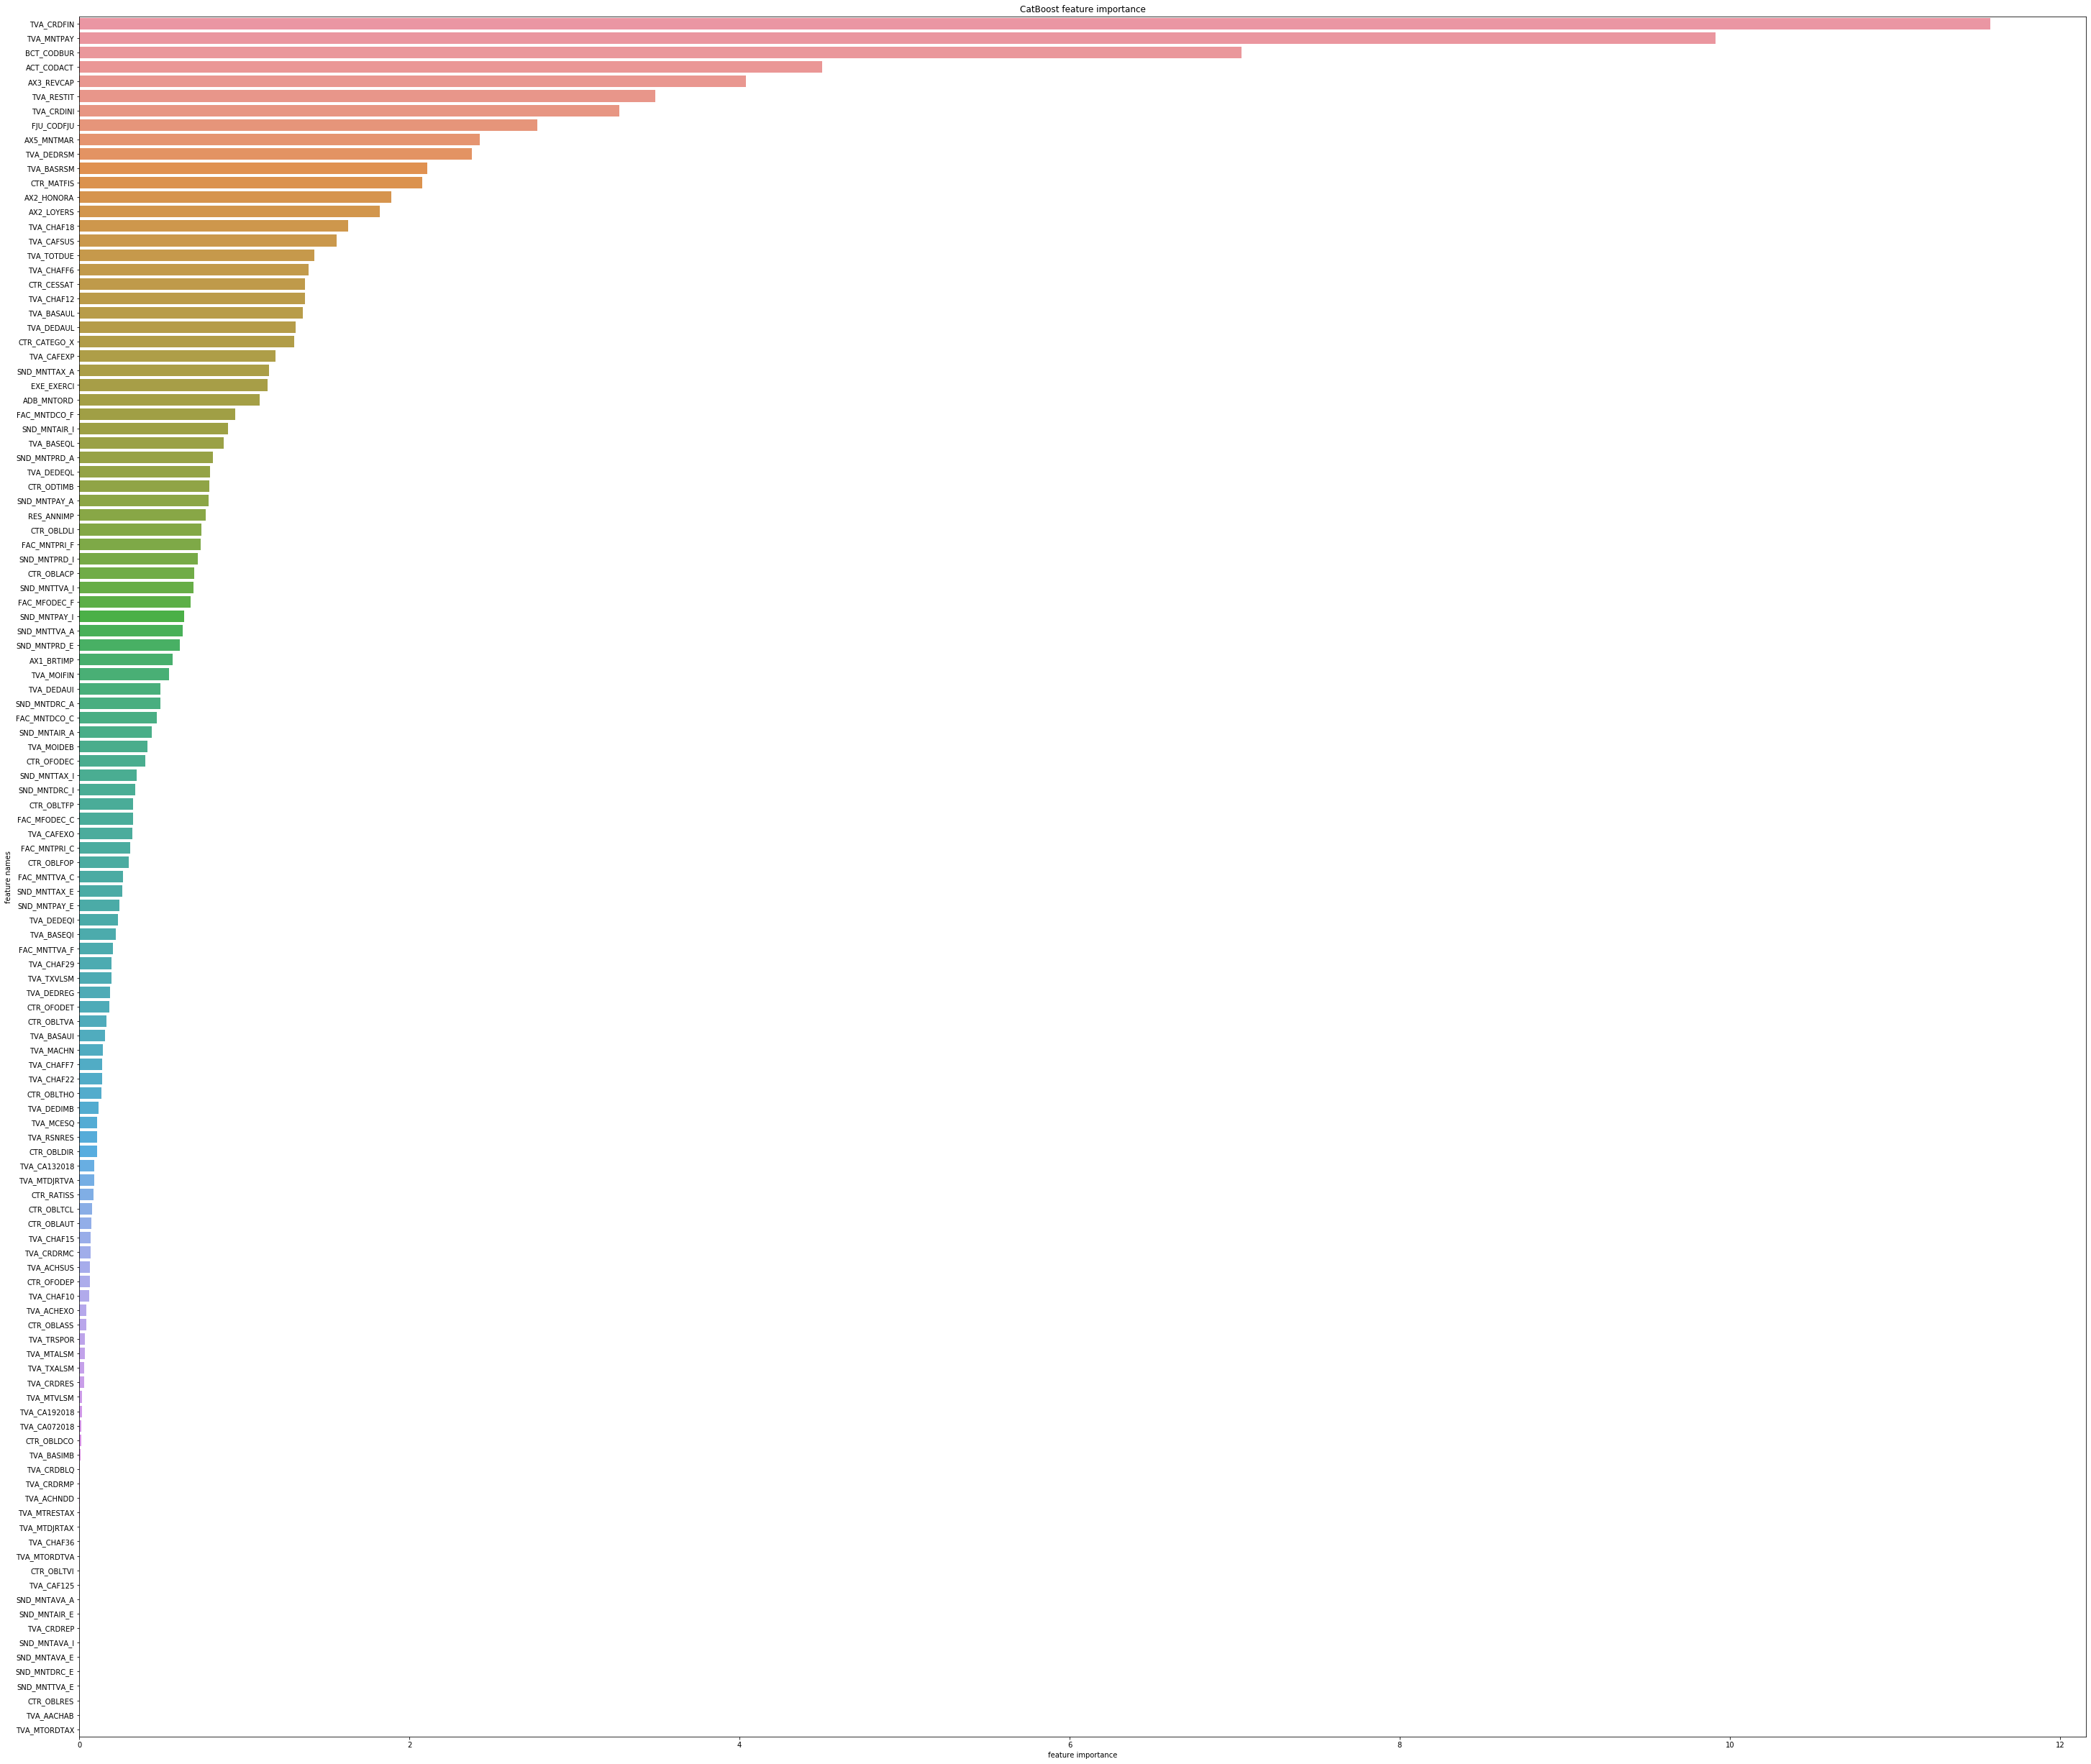

In [212]:
plot_feature_importance(cat_model.feature_importances_, my_train.columns, 'CatBoost')

In [136]:
plt.savefig('try.jpg')

<Figure size 432x288 with 0 Axes>

In [141]:
lgb_model = LGBMRegressor()

In [142]:
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [143]:
lgb_pred = lgb_model.predict(X_test)

In [144]:
np.sqrt(mean_squared_error(y_test, lgb_pred))

5.9624634167323585

In [145]:
lgb_final = lgb_model.predict(test)

In [146]:
submit['target'] = lgb_final

In [147]:
submit.to_csv('eighth.csv', index=False)

# stacking

In [162]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor(n_neighbors=5)
    models['rfc'] = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)
    models['xgb'] = XGBRegressor(learning_rate =0.1, n_estimators=150, max_depth=10, reg_lambda=9)
    
    return models

In [163]:
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    
    return scores

In [164]:
def get_stacking():
    level0 = list()
    level0.append(('knn', KNeighborsRegressor(n_neighbors=5)))
    level0.append(('rfc', RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)))
    level0.append(('xgb', XGBRegressor(learning_rate =0.1, n_estimators=150, max_depth=10, reg_lambda=9)))
    
    level1 = CatBoostRegressor(learning_rate=0.1, iterations=110, depth=10)
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    
    return model

In [165]:
def get_models_final():
    models = dict()
    models['knn'] = KNeighborsRegressor(n_neighbors=5)
    models['rfc'] = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)
    models['xgb'] = XGBRegressor(learning_rate =0.1, n_estimators=150, max_depth=10, reg_lambda=9)
    models['stacking'] = get_stacking()
    
    return models

In [155]:
#models without stacking

models = get_models()
results, names = list(), list()

print("Errors of the model without stacking")

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    
    print('>%s %.3f(%.3f)' %(name, np.mean(scores), np.std(scores)))

Errors of the model without stacking
>knn -5.029(0.092)
>rfc -4.727(0.089)
>xgb -4.143(0.091)


In [ ]:
#models with stacking

models = get_models_final()

results, names = list(), list()

print("Errors of the model with stacking")

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    
    print('>%s %.3f(%.3f)' %(name, np.mean(scores), np.std(scores)))

In [166]:
#final model for prediction

level0 = list()
level0.append(('knn', KNeighborsRegressor(n_neighbors=5)))
level0.append(('rfc', RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)))
level0.append(('xgb', XGBRegressor(learning_rate =0.1, n_estimators=150, max_depth=10, reg_lambda=9)))

level1 = CatBoostRegressor(learning_rate=0.1, iterations=110, depth=10)

final_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

In [168]:
final_model.fit(X_train, y_train)

0:	learn: 6.8576327	total: 22.7ms	remaining: 2.47s
1:	learn: 6.6897410	total: 45.2ms	remaining: 2.44s
2:	learn: 6.5466678	total: 68.7ms	remaining: 2.45s
3:	learn: 6.4268736	total: 91.9ms	remaining: 2.43s
4:	learn: 6.3297122	total: 115ms	remaining: 2.41s
5:	learn: 6.2472722	total: 137ms	remaining: 2.37s
6:	learn: 6.1792822	total: 159ms	remaining: 2.34s
7:	learn: 6.1244545	total: 183ms	remaining: 2.34s
8:	learn: 6.0782080	total: 206ms	remaining: 2.31s
9:	learn: 6.0389972	total: 217ms	remaining: 2.17s
10:	learn: 6.0049133	total: 241ms	remaining: 2.17s
11:	learn: 5.9783211	total: 272ms	remaining: 2.22s
12:	learn: 5.9555472	total: 297ms	remaining: 2.22s
13:	learn: 5.9359342	total: 320ms	remaining: 2.19s
14:	learn: 5.9208632	total: 342ms	remaining: 2.17s
15:	learn: 5.9062382	total: 365ms	remaining: 2.14s
16:	learn: 5.8940093	total: 387ms	remaining: 2.12s
17:	learn: 5.8845000	total: 418ms	remaining: 2.14s
18:	learn: 5.8749620	total: 442ms	remaining: 2.12s
19:	learn: 5.8676362	total: 468ms	rem

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('rfc',
                               RandomForestRegressor(max_depth=5,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate...
                                            max_delta_step=None, max_depth=10,
                                        

In [169]:
final_pred = final_model.predict(X_test)

In [170]:
np.sqrt(mean_squared_error(y_test, final_pred))

5.888126896469923

In [171]:
final_final = final_model.predict(test)

In [172]:
submit['target'] = final_final

In [173]:
submit.to_csv('ninth.csv', index=False)

In [174]:
def rmse(val_test, val_predict):
    acc = np.sqrt(mean_squared_error(val_test, val_predict))
    return acc

In [175]:
xgb = XGBRegressor(learning_rate =0.1, n_estimators=150, max_depth=10, reg_lambda=9)
NFOLDS = 7
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=30)

In [176]:
scores = []

for fold, (tr_in, te_in) in enumerate(kf.split(X)):
    print(f'============fold{fold}=============')
    X_train, X_test = X.iloc[tr_in], X.iloc[te_in]
    y_train, y_test = y.iloc[tr_in], y.iloc[te_in]
    xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=500)
    scores.append(rmse(y_test, xgb.predict(X_test)))

    
print(scores)

============fold0=============
[0]	validation_0-rmse:12.28117	validation_1-rmse:12.35677
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:11.35464	validation_1-rmse:11.45664
[2]	validation_0-rmse:10.53719	validation_1-rmse:10.66558
[3]	validation_0-rmse:9.81594	validation_1-rmse:9.98350
[4]	validation_0-rmse:9.18007	validation_1-rmse:9.38515
[5]	validation_0-rmse:8.62546	validation_1-rmse:8.87356
[6]	validation_0-rmse:8.13735	validation_1-rmse:8.42800
[7]	validation_0-rmse:7.70649	validation_1-rmse:8.04732
[8]	validation_0-rmse:7.33718	validation_1-rmse:7.71728
[9]	validation_0-rmse:7.00723	validation_1-rmse:7.43936
[10]	validation_0-rmse:6.72642	validation_1-rmse:7.20343
[11]	validation_0-rmse:6.47785	validation_1-rmse:7.00703
[12]	validation_0-rmse:6.26558	validation_1-rmse:6.83613
[13]	validation_0-rmse:6.07264	validation_1-rmse:6.69444
[14]	validation

[140]	validation_0-rmse:3.44781	validation_1-rmse:5.69456
[141]	validation_0-rmse:3.44435	validation_1-rmse:5.69435
[142]	validation_0-rmse:3.44314	validation_1-rmse:5.69477
[143]	validation_0-rmse:3.42875	validation_1-rmse:5.69399
[144]	validation_0-rmse:3.42090	validation_1-rmse:5.69183
[145]	validation_0-rmse:3.40950	validation_1-rmse:5.69212
[146]	validation_0-rmse:3.40266	validation_1-rmse:5.69161
[147]	validation_0-rmse:3.40001	validation_1-rmse:5.69210
[148]	validation_0-rmse:3.39658	validation_1-rmse:5.69167
[149]	validation_0-rmse:3.38721	validation_1-rmse:5.69193
============fold1=============
[0]	validation_0-rmse:12.31496	validation_1-rmse:12.12271
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:11.38544	validation_1-rmse:11.22454
[2]	validation_0-rmse:10.56486	validation_1-rmse:10.43499
[3]	validation_0-rmse:9.84068	validation_1-rmse:9.75439

[130]	validation_0-rmse:3.54699	validation_1-rmse:5.74942
[131]	validation_0-rmse:3.53221	validation_1-rmse:5.74723
[132]	validation_0-rmse:3.52176	validation_1-rmse:5.74561
[133]	validation_0-rmse:3.51532	validation_1-rmse:5.74579
[134]	validation_0-rmse:3.51055	validation_1-rmse:5.74521
[135]	validation_0-rmse:3.50308	validation_1-rmse:5.74290
[136]	validation_0-rmse:3.49378	validation_1-rmse:5.74320
[137]	validation_0-rmse:3.48421	validation_1-rmse:5.74205
[138]	validation_0-rmse:3.47723	validation_1-rmse:5.74103
[139]	validation_0-rmse:3.47512	validation_1-rmse:5.74109
[140]	validation_0-rmse:3.47374	validation_1-rmse:5.74074
[141]	validation_0-rmse:3.45674	validation_1-rmse:5.73808
[142]	validation_0-rmse:3.44609	validation_1-rmse:5.73644
[143]	validation_0-rmse:3.43867	validation_1-rmse:5.73581
[144]	validation_0-rmse:3.43238	validation_1-rmse:5.73496
[145]	validation_0-rmse:3.42588	validation_1-rmse:5.73418
[146]	validation_0-rmse:3.42408	validation_1-rmse:5.73406
[147]	validati

[120]	validation_0-rmse:3.56425	validation_1-rmse:5.70965
[121]	validation_0-rmse:3.54571	validation_1-rmse:5.70693
[122]	validation_0-rmse:3.53369	validation_1-rmse:5.70677
[123]	validation_0-rmse:3.52471	validation_1-rmse:5.70538
[124]	validation_0-rmse:3.51197	validation_1-rmse:5.70512
[125]	validation_0-rmse:3.50455	validation_1-rmse:5.70471
[126]	validation_0-rmse:3.49419	validation_1-rmse:5.70447
[127]	validation_0-rmse:3.48392	validation_1-rmse:5.70270
[128]	validation_0-rmse:3.47804	validation_1-rmse:5.70114
[129]	validation_0-rmse:3.47440	validation_1-rmse:5.70072
[130]	validation_0-rmse:3.46491	validation_1-rmse:5.70006
[131]	validation_0-rmse:3.44474	validation_1-rmse:5.69344
[132]	validation_0-rmse:3.44027	validation_1-rmse:5.69342
[133]	validation_0-rmse:3.43364	validation_1-rmse:5.69497
[134]	validation_0-rmse:3.41951	validation_1-rmse:5.69193
[135]	validation_0-rmse:3.40971	validation_1-rmse:5.68935
[136]	validation_0-rmse:3.40056	validation_1-rmse:5.68870
[137]	validati

[110]	validation_0-rmse:3.69443	validation_1-rmse:5.64574
[111]	validation_0-rmse:3.68942	validation_1-rmse:5.64552
[112]	validation_0-rmse:3.68412	validation_1-rmse:5.64425
[113]	validation_0-rmse:3.67873	validation_1-rmse:5.64389
[114]	validation_0-rmse:3.67583	validation_1-rmse:5.64378
[115]	validation_0-rmse:3.67110	validation_1-rmse:5.64294
[116]	validation_0-rmse:3.66577	validation_1-rmse:5.64295
[117]	validation_0-rmse:3.66336	validation_1-rmse:5.64289
[118]	validation_0-rmse:3.65911	validation_1-rmse:5.64307
[119]	validation_0-rmse:3.64332	validation_1-rmse:5.64086
[120]	validation_0-rmse:3.63920	validation_1-rmse:5.64107
[121]	validation_0-rmse:3.63125	validation_1-rmse:5.64046
[122]	validation_0-rmse:3.62043	validation_1-rmse:5.63880
[123]	validation_0-rmse:3.61735	validation_1-rmse:5.63940
[124]	validation_0-rmse:3.61242	validation_1-rmse:5.64036
[125]	validation_0-rmse:3.59958	validation_1-rmse:5.64077
[126]	validation_0-rmse:3.59639	validation_1-rmse:5.64091
[127]	validati

[100]	validation_0-rmse:3.97065	validation_1-rmse:5.83813
[101]	validation_0-rmse:3.96832	validation_1-rmse:5.83781
[102]	validation_0-rmse:3.95596	validation_1-rmse:5.83521
[103]	validation_0-rmse:3.93920	validation_1-rmse:5.83382
[104]	validation_0-rmse:3.92307	validation_1-rmse:5.83126
[105]	validation_0-rmse:3.91591	validation_1-rmse:5.83137
[106]	validation_0-rmse:3.90757	validation_1-rmse:5.82886
[107]	validation_0-rmse:3.88605	validation_1-rmse:5.82701
[108]	validation_0-rmse:3.88118	validation_1-rmse:5.82704
[109]	validation_0-rmse:3.87602	validation_1-rmse:5.82779
[110]	validation_0-rmse:3.87194	validation_1-rmse:5.82918
[111]	validation_0-rmse:3.85383	validation_1-rmse:5.82872
[112]	validation_0-rmse:3.84895	validation_1-rmse:5.82887
[113]	validation_0-rmse:3.84465	validation_1-rmse:5.82795
[114]	validation_0-rmse:3.83945	validation_1-rmse:5.82763
[115]	validation_0-rmse:3.83548	validation_1-rmse:5.82694
[116]	validation_0-rmse:3.81431	validation_1-rmse:5.82238
[117]	validati

[90]	validation_0-rmse:3.86458	validation_1-rmse:5.85888
[91]	validation_0-rmse:3.86166	validation_1-rmse:5.85826
[92]	validation_0-rmse:3.85876	validation_1-rmse:5.85740
[93]	validation_0-rmse:3.84418	validation_1-rmse:5.85528
[94]	validation_0-rmse:3.83155	validation_1-rmse:5.85399
[95]	validation_0-rmse:3.81807	validation_1-rmse:5.85322
[96]	validation_0-rmse:3.81306	validation_1-rmse:5.85351
[97]	validation_0-rmse:3.79460	validation_1-rmse:5.85137
[98]	validation_0-rmse:3.78380	validation_1-rmse:5.85210
[99]	validation_0-rmse:3.77302	validation_1-rmse:5.85029
[100]	validation_0-rmse:3.76472	validation_1-rmse:5.85041
[101]	validation_0-rmse:3.74215	validation_1-rmse:5.84648
[102]	validation_0-rmse:3.73795	validation_1-rmse:5.84539
[103]	validation_0-rmse:3.72707	validation_1-rmse:5.84640
[104]	validation_0-rmse:3.71759	validation_1-rmse:5.84505
[105]	validation_0-rmse:3.70551	validation_1-rmse:5.84123
[106]	validation_0-rmse:3.69746	validation_1-rmse:5.83845
[107]	validation_0-rmse:

[80]	validation_0-rmse:3.94793	validation_1-rmse:6.04282
[81]	validation_0-rmse:3.93458	validation_1-rmse:6.03972
[82]	validation_0-rmse:3.91686	validation_1-rmse:6.03464
[83]	validation_0-rmse:3.90706	validation_1-rmse:6.03317
[84]	validation_0-rmse:3.90416	validation_1-rmse:6.03265
[85]	validation_0-rmse:3.89895	validation_1-rmse:6.03121
[86]	validation_0-rmse:3.87467	validation_1-rmse:6.03089
[87]	validation_0-rmse:3.86216	validation_1-rmse:6.03053
[88]	validation_0-rmse:3.85030	validation_1-rmse:6.03090
[89]	validation_0-rmse:3.83592	validation_1-rmse:6.03011
[90]	validation_0-rmse:3.81324	validation_1-rmse:6.02677
[91]	validation_0-rmse:3.80275	validation_1-rmse:6.02416
[92]	validation_0-rmse:3.79547	validation_1-rmse:6.02289
[93]	validation_0-rmse:3.79204	validation_1-rmse:6.02181
[94]	validation_0-rmse:3.78555	validation_1-rmse:6.02061
[95]	validation_0-rmse:3.77558	validation_1-rmse:6.02100
[96]	validation_0-rmse:3.76502	validation_1-rmse:6.01920
[97]	validation_0-rmse:3.76285	

In [178]:
print(min(scores))

5.6286415835788635


In [179]:
kfold_pred = xgb.predict(test)

In [180]:
submit['target'] = kfold_pred

In [181]:
submit.to_csv('tenth.csv', index=False)

In [184]:
rfc = RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=200)
NFOLDS = 7
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=30)

In [186]:
scores = []

for fold, (tr_in, te_in) in enumerate(kf.split(X)):
    print(f'============fold{fold}=============')
    X_train, X_test = X.iloc[tr_in], X.iloc[te_in]
    y_train, y_test = y.iloc[tr_in], y.iloc[te_in]
    rfc.fit(X_train, y_train)
    scores.append(rmse(y_test, rfc.predict(X_test)))
    print(scores[-1])
    
print(scores)

============fold0=============
6.160882447126266
============fold1=============
6.230220648655394
============fold2=============
6.210545511685941
============fold3=============
6.113518223685077
============fold4=============
6.1937373357033705
============fold5=============
6.241600356622631
============fold6=============
6.412117998412617
[6.160882447126266, 6.230220648655394, 6.210545511685941, 6.113518223685077, 6.1937373357033705, 6.241600356622631, 6.412117998412617]


In [187]:
rfc_kfold = rfc.predict(test)

In [188]:
submit['target'] = rfc_kfold

In [189]:
submit.to_csv('eleventh.csv', index=False)

In [190]:
cat = CatBoostRegressor(learning_rate=0.1, iterations=110, depth=10)
NFOLDS = 7
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=30)

In [191]:
scores = []

for fold, (tr_in, te_in) in enumerate(kf.split(X)):
    print(f'============fold{fold}=============')
    X_train, X_test = X.iloc[tr_in], X.iloc[te_in]
    y_train, y_test = y.iloc[tr_in], y.iloc[te_in]
    cat.fit(X_train, y_train)
    scores.append(rmse(y_test, cat.predict(X_test)))
#     print(scores[-1])
    
print(scores)

============fold0=============
0:	learn: 6.9437996	total: 322ms	remaining: 35.1s
1:	learn: 6.8261406	total: 653ms	remaining: 35.3s
2:	learn: 6.7250473	total: 1.01s	remaining: 36.2s
3:	learn: 6.6276094	total: 1.37s	remaining: 36.3s
4:	learn: 6.5526490	total: 1.71s	remaining: 35.9s
5:	learn: 6.4876042	total: 2.04s	remaining: 35.4s
6:	learn: 6.4300558	total: 2.37s	remaining: 34.9s
7:	learn: 6.3731268	total: 2.71s	remaining: 34.5s
8:	learn: 6.3262556	total: 3.03s	remaining: 34s
9:	learn: 6.2850975	total: 3.36s	remaining: 33.6s
10:	learn: 6.2506079	total: 3.69s	remaining: 33.2s
11:	learn: 6.2112007	total: 4.02s	remaining: 32.8s
12:	learn: 6.1825157	total: 4.35s	remaining: 32.5s
13:	learn: 6.1509783	total: 4.69s	remaining: 32.1s
14:	learn: 6.1273688	total: 5.02s	remaining: 31.8s
15:	learn: 6.1086429	total: 5.35s	remaining: 31.4s
16:	learn: 6.0867859	total: 5.68s	remaining: 31.1s
17:	learn: 6.0620393	total: 6.01s	remaining: 30.7s
18:	learn: 6.0400011	total: 6.35s	remaining: 30.4s
19:	learn: 6

51:	learn: 5.6748822	total: 17.5s	remaining: 19.5s
52:	learn: 5.6694882	total: 17.8s	remaining: 19.1s
53:	learn: 5.6628911	total: 18.1s	remaining: 18.8s
54:	learn: 5.6557059	total: 18.4s	remaining: 18.4s
55:	learn: 5.6485694	total: 18.7s	remaining: 18s
56:	learn: 5.6421180	total: 19s	remaining: 17.7s
57:	learn: 5.6342272	total: 19.4s	remaining: 17.3s
58:	learn: 5.6262020	total: 19.7s	remaining: 17s
59:	learn: 5.6186873	total: 20s	remaining: 16.6s
60:	learn: 5.6157210	total: 20.3s	remaining: 16.3s
61:	learn: 5.6116540	total: 20.6s	remaining: 15.9s
62:	learn: 5.6020368	total: 20.9s	remaining: 15.6s
63:	learn: 5.5956688	total: 21.2s	remaining: 15.2s
64:	learn: 5.5915499	total: 21.5s	remaining: 14.9s
65:	learn: 5.5841842	total: 21.9s	remaining: 14.6s
66:	learn: 5.5812236	total: 22.2s	remaining: 14.3s
67:	learn: 5.5775380	total: 22.6s	remaining: 13.9s
68:	learn: 5.5734652	total: 22.9s	remaining: 13.6s
69:	learn: 5.5715383	total: 23.2s	remaining: 13.2s
70:	learn: 5.5650247	total: 23.5s	remai

103:	learn: 5.3832054	total: 35.3s	remaining: 2.04s
104:	learn: 5.3777948	total: 35.6s	remaining: 1.7s
105:	learn: 5.3736242	total: 36s	remaining: 1.36s
106:	learn: 5.3698302	total: 36.3s	remaining: 1.02s
107:	learn: 5.3592213	total: 36.6s	remaining: 678ms
108:	learn: 5.3561870	total: 36.9s	remaining: 339ms
109:	learn: 5.3536256	total: 37.2s	remaining: 0us
============fold3=============
0:	learn: 6.9463260	total: 307ms	remaining: 33.4s
1:	learn: 6.8196768	total: 644ms	remaining: 34.8s
2:	learn: 6.7190226	total: 994ms	remaining: 35.4s
3:	learn: 6.6305844	total: 1.36s	remaining: 36.1s
4:	learn: 6.5611185	total: 1.67s	remaining: 35.1s
5:	learn: 6.4940810	total: 1.99s	remaining: 34.4s
6:	learn: 6.4383682	total: 2.36s	remaining: 34.7s
7:	learn: 6.3898125	total: 2.75s	remaining: 35.1s
8:	learn: 6.3404064	total: 3.13s	remaining: 35.2s
9:	learn: 6.2930678	total: 3.51s	remaining: 35.1s
10:	learn: 6.2555392	total: 3.86s	remaining: 34.7s
11:	learn: 6.2178424	total: 4.23s	remaining: 34.6s
12:	lear

44:	learn: 5.7637509	total: 15.4s	remaining: 22.2s
45:	learn: 5.7592969	total: 15.7s	remaining: 21.9s
46:	learn: 5.7496751	total: 16s	remaining: 21.5s
47:	learn: 5.7389588	total: 16.3s	remaining: 21.1s
48:	learn: 5.7327107	total: 16.7s	remaining: 20.7s
49:	learn: 5.7215348	total: 17s	remaining: 20.4s
50:	learn: 5.7086465	total: 17.3s	remaining: 20s
51:	learn: 5.7043999	total: 17.6s	remaining: 19.6s
52:	learn: 5.7011413	total: 17.9s	remaining: 19.2s
53:	learn: 5.6957677	total: 18.2s	remaining: 18.9s
54:	learn: 5.6890586	total: 18.5s	remaining: 18.5s
55:	learn: 5.6835719	total: 18.8s	remaining: 18.1s
56:	learn: 5.6760446	total: 19.1s	remaining: 17.8s
57:	learn: 5.6726685	total: 19.4s	remaining: 17.4s
58:	learn: 5.6671821	total: 19.7s	remaining: 17s
59:	learn: 5.6602202	total: 20s	remaining: 16.7s
60:	learn: 5.6550341	total: 20.3s	remaining: 16.3s
61:	learn: 5.6465357	total: 20.6s	remaining: 16s
62:	learn: 5.6422744	total: 20.9s	remaining: 15.6s
63:	learn: 5.6362918	total: 21.2s	remaining

95:	learn: 5.4290542	total: 29.9s	remaining: 4.35s
96:	learn: 5.4250198	total: 30.2s	remaining: 4.04s
97:	learn: 5.4223884	total: 30.5s	remaining: 3.73s
98:	learn: 5.4169844	total: 30.8s	remaining: 3.42s
99:	learn: 5.4136716	total: 31.1s	remaining: 3.11s
100:	learn: 5.4113172	total: 31.4s	remaining: 2.8s
101:	learn: 5.4028942	total: 31.7s	remaining: 2.49s
102:	learn: 5.3940502	total: 32s	remaining: 2.17s
103:	learn: 5.3909147	total: 32.3s	remaining: 1.86s
104:	learn: 5.3869349	total: 32.6s	remaining: 1.55s
105:	learn: 5.3834450	total: 32.9s	remaining: 1.24s
106:	learn: 5.3748197	total: 33.2s	remaining: 932ms
107:	learn: 5.3667797	total: 33.5s	remaining: 621ms
108:	learn: 5.3638204	total: 33.8s	remaining: 311ms
109:	learn: 5.3565295	total: 34.2s	remaining: 0us
============fold6=============
0:	learn: 6.9388754	total: 305ms	remaining: 33.2s
1:	learn: 6.8208899	total: 610ms	remaining: 33s
2:	learn: 6.7153177	total: 977ms	remaining: 34.8s
3:	learn: 6.6166758	total: 1.29s	remaining: 34.1s
4

In [192]:
print(min(scores))

5.827933264902549


In [193]:
cat_fold = cat.predict(test)

In [194]:
submit['target'] = cat_fold

In [195]:
submit.to_csv('twelveth.csv', index=False)

In [196]:
knn = KNeighborsRegressor(n_neighbors=5)
NFOLDS = 7
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=30)

In [198]:
scores = []

for fold, (tr_in, te_in) in enumerate(kf.split(X)):
    print(f'============fold{fold}=============')
    X_train, X_test = X.iloc[tr_in], X.iloc[te_in]
    y_train, y_test = y.iloc[tr_in], y.iloc[te_in]
    knn.fit(X_train, y_train)
    scores.append(rmse(y_test, knn.predict(X_test)))
    print(scores[-1])
    
print(scores)

============fold0=============
6.831557743928944
============fold1=============
6.936085547139359
============fold2=============
6.803777059152078
============fold3=============
6.9067668633699935
============fold4=============
6.884213300205867
============fold5=============
6.984829701106926
============fold6=============
7.009501249326377
[6.831557743928944, 6.936085547139359, 6.803777059152078, 6.9067668633699935, 6.884213300205867, 6.984829701106926, 7.009501249326377]


In [199]:
knn_kfold = knn.predict(test)

In [202]:
submit['target'] = knn_kfold

In [203]:
submit.to_csv('thirteen.csv', index=False)

In [207]:
dtr = DecisionTreeRegressor()
NFOLDS = 7
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=30)

In [208]:
scores = []

for fold, (tr_in, te_in) in enumerate(kf.split(X)):
    print(f'============fold{fold}=============')
    X_train, X_test = X.iloc[tr_in], X.iloc[te_in]
    y_train, y_test = y.iloc[tr_in], y.iloc[te_in]
    dtr.fit(X_train, y_train)
    scores.append(rmse(y_test, dtr.predict(X_test)))
    print(scores[-1])
    
print(scores)

============fold0=============
8.180135175379915
============fold1=============
8.01337008432555
============fold2=============
8.123322666149628
============fold3=============
7.813111766041892
============fold4=============
8.006602370178046
============fold5=============
8.195188112666509
============fold6=============
8.168570512810486
[8.180135175379915, 8.01337008432555, 8.123322666149628, 7.813111766041892, 8.006602370178046, 8.195188112666509, 8.168570512810486]


In [209]:
dtr_kfold = dtr.predict(test)

In [210]:

submit['target'] = dtr_kfold

In [211]:
submit.to_csv('foruteen.csv', index=False)

In [213]:
cor_data = train.corr()

In [214]:
cor_data

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
BCT_CODBUR,1.000000,-0.006992,-0.240261,-0.283258,-0.055153,-0.057538,-0.064334,-0.060696,5.976010e-02,-0.009955,0.023547,0.037696,0.067296,0.035192,0.028278,0.039637,0.013860,1.104357e-02,0.250366,-0.025360,0.042059,0.005588,-1.060458e-02,-1.048186e-02,-0.017975,0.114274,0.020305,4.463371e-03,0.091823,NaN,0.040050,0.126721,0.038014,0.024460,NaN,0.135802,-0.022768,0.124142,0.037709,0.037704,0.063861,0.063427,0.035093,0.053108,0.138108,0.147632,0.155980,0.180107,0.062012,0.065437,0.049175,0.012828,0.022846,0.079154,0.061343,0.008890,0.112624,0.009912,0.044281,0.009912,0.130532,0.082910,0.038014,0.016467,0.013071,0.001158,0.010194,NaN,0.012026,0.050689,0.055683,-0.001586,-0.001695,-0.001690,-0.001688,0.020075,0.032793,NaN,0.013135,0.013135,0.006061,0.011379,0.018678,7.563266e-02,9.390522e-02,1.207425e-01,2.679461e-02,NaN,8.590115e-02,1.050693e-01,3.225356e-02,4.724209e-02,NaN,NaN,NaN,1.039350e-02,1.039350e-02,NaN,5.387618e-02,1.329115e-02,1.063956e-02,NaN,2.576888e-02,1.970405e-02,9.771477e-03,0.005656,0.068033,0.057564,0.051081,0.148298,-0.017975,-9.952748e-02,-7.267110e-03,-9.958631e-03,1.881169e-02,1.419836e-02,4.352177e-02,2.440463e-02,-4.031136e-04,4.182665e-02
CTR_MATFIS,-0.006992,1.000000,-0.008536,-0.009612,0.010618,0.004480,-0.001694,-0.007198,1.038332e-02,-0.008772,0.000050,-0.007098,0.015228,-0.003366,-0.007424,0.007323,0.000011,-5.365462e-03,0.010945,0.005246,0.009197,0.001284,1.440414e-02,8.772957e-03,0.017828,-0.014348,0.001812,-4.464830e-03,-0.021730,NaN,0.004221,-0.003739,-0.005451,0.007681,NaN,-0.004876,0.016782,-0.010472,-0.011501,-0.011535,-0.013472,-0.013708,0.005085,0.005643,0.000387,-0.006497,-0.019938,-0.021908,-0.006996,-0.006022,-0.015694,0.005038,-0.000687,-0.011704,0.007529,-0.001895,-0.011889,-0.009554,-0.009291,-0.009554,-0.019153,-0.016317,0.011013,-0.003974,-0.004514,0.004278,0.000970,NaN,-0.000096,0.003172,-0.011874,0.005287,0.005271,0.005184,0.005180,-0.006562,0.000390,NaN,-0.004123,-0.004123,0.009313,-0.006220,0.002539,1.554669e-02,-1.715933e-02,-2.078328e-02,-1.212371e-02,NaN,-4.476165e-03,-1.846957e-02,-9.841895e-03,-1.756597e-02,NaN,NaN,NaN,-4.776082e-03,-4.776082e-03,NaN,1.271662e-02,5.939460e-04,8.751596e-03,NaN,-2.043447e-03,5.167158e-03,9.056192e-04,-0.002638,-0.002361,-0.018426,-0.012856,-0.016952,0.017828,4.369254e-03,9.469896e-03,-6.939440e-03,-3.537584e-03,-1.240856e-02,-5.265602e-03,-9.151917e-04,7.191169e-03,-4.607595e-03
CTR_CATEGO_X,-0.240261,-0.008536,1.000000,0.899464,0.048443,0.468140,0.441776,0.154103,-1.411740e-01,0.014274,-0.081679,-0.056404,-0.166460,-0.223799,-0.029949,-0.104354,-0.035090,-5.562020e-03,-0.752

In [228]:
train.head(5)

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
0,49,14185,0,99,1,6101,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,612500.0,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123608.0,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.306010e+08,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,54965.109585,0.000000,5.891200e+07,0.000000e+00,2.530630e+06,0.000000e+00,2013,13.575957,8.465864e+09,6.003678e+06,241110.011832,4.717475e+08,9.833204e+08,2.650891e+06,29334.520614,1.636481e+08
1,221,6032,0,99,0,6271,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.306010e+08,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,54965.109585,0.000000,3.425295e+06,0.000000e+00,1.092498e+07,0.000000e+00,2013,11.692894,8.465864e+09,6.003678e+06,241110.011832,4.717475e+08,9.833204e+08,2.650891e+06,29334.520614,1.636481e+08
2,181,8907,0,99,0,6102,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.0,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18861497.0,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.444275e+07,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06,0.0,1.636271e+06,4.789899e+06,54965.109585,836575.591005,6.498808e+07,1.595258e+07,1.773714e+07,1.061817e+09,2015,0.000000,8.465864e+09,6.003678e+06,241110.011832,4.717475e+08,9.833204e+08,2.650891e+06,29334.520614,1.636481e+08
3,252,5783,1,22,0,4403,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9083122.0,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [229]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
0,9,11802,0,99,0,6306,8,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,14220000.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.706400e+06,1.0,0.0,0.0,0.0,1.123098e+06,166462.0,0.0,0.0,4.146150e+05,5.829900e+04,0.000000e+00,0.0,1706400.0,853200.0,0.0,0.0,0.0,0.0,628439.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.902788e+08,3.740922e+09,5.288673e+08,4.580600e+07,0.0,1.357527e+08,7.096445e+08,4.949041e+08,1.693836e+09,0.0,0.0,0.0,7.572893e+06,7.572893e+06,0.0,6.360067e+09,1.491447e+06,163541.682197,0.0,1.534637e+06,3.189000e+06,80727.065369,0.000000e+00,1.428373e+07,0.000000e+00,0.000000e+00,2.546400e+06,2015,3.931023e+09,2.149988e+06,1.650450e+06,3.179770e+08,8.931182e+08,950264.481123,3193.985479,1.324524e+08
1,255,2713,1,99,0,4409,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,2.0,1.0,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+05,0.0,0.0,0.0,5.400000e+04,1.0,55075.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.902788e+08,3.740922e+09,5.288673e+08,4.580600e+07,0.0,1.357527e+08,7.096445e+08,4.949041e+08,1.693836e+09,0.0,0.0,0.0,7.572893e+06,7.572893e+06,0.0,6.360067e+09,1.491447e+06,163541.682197,0.0,1.534637e+06,3.189000e+06,80727.065369,2.174491e+07,8.629958e+07,1.272062e+07,1.522630e+07,1.049029e+09,2016,3.931023e+09,2.149988e+06,1.650450e+06,3.179770e+08,8.931182e+08,950264.481123,3193.985479,1.324524e+08
2,201,152,2,22,0,3603,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2016,57269251.0,0.0,0.0,4947931.0,0.0,0.0,1.364018e+10,0.0,0.0,0.0,2.459261e+09,1.0,0.0,46995188.0,8459133.0,1.229050e+09,239880275.0,661683856.0,119103094.0,7.400178e+09,1.334555e+09,3.713953e+09,668511597.0,555100.0,138775.0,0.0,158000.0,121620155.0,0.0,88381829.0,12.0,121620155.0,0.0,0.0,0.0,31296805.0,67871456.0,849120.0,0.0,0.0,0.0,0.0,0.0,0.0,18071477.0,923419041.0,250100.0,30012.0,987278.0,177710.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.902788e+08,3.820100e+09,7.101714e+08,0.000000e+00,0.0,1.592111e+08,8.693826e+08,1.735588e+09,1.693836e+09,0.0,0.0,0.0,7.572893e+06,7.572893e+06,0.0,8.600000e+07,0.000000e+00,0.000000,0.0,2.300000e+05,2.300000e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.109489e+09,2016,6.787146e+07,0.000000e+00,0.000000e+00,1.209345e+07,8.931182e+08,950264.481123,3193.985479,1.324524e+08
3,302,7698,2,22,0,4203,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,0.0,0.0,0.0,6.966936e

In [218]:
def label_encode(df, col):
    df[col] = df[col].factorize()[0]
    return df

In [222]:
train = label_encode(train, 'CTR_CATEGO_X')
test = label_encode(test, 'CTR_CATEGO_X')

In [252]:
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_model, X, y, cv=10)
    k_scores.append(scores.mean())
print(k_scores)

KeyboardInterrupt: 